C:\Users\AFET\AppData\Local\Temp/ipykernel_6932/3768970568.py:20: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return np.array([quad(dExdt, 0, 2*np.pi, args =(x,y))[0], #quad'ın hata gösteren kısmını almamak için [0] koydum
C:\Users\AFET\AppData\Local\Temp/ipykernel_6932/3768970568.py:21: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad(dEydt, 0, 2*np.pi, args =(x,y))[0]
C:\Users\AFET\AppData\Local\Temp/ipykernel_6932/3768970568.py:20: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return np.array([quad(dExdt, 0

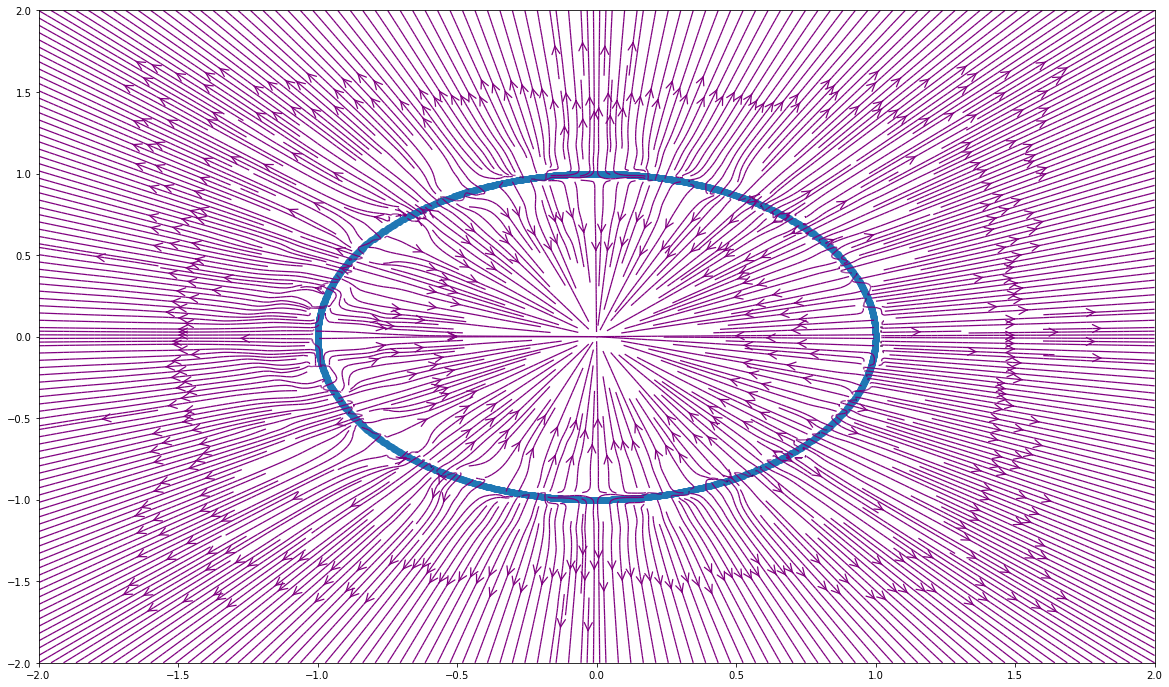

In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import quad
import sympy as smp
import matplotlib.pyplot as plt

t = smp.symbols('t')
x,y,a,Q = smp.symbols('x y a Q')
r = smp.Matrix([x,y]) #uzaydaki bir noktanın konumu
rp = smp.Matrix([smp.cos(2*t),smp.sin(2*t)]) # r', çubuğumuzdaki bir noktanın konumu, bir çubukla uğraştığımız için çubuğun x lokasyonuna 0 verdim
sep = r - rp # çubuktaki bir nokta ile uzaydaki bir nokta arasındaki mesafe
yuk = 1.6*10**-19

integrand = yuk*sep/sep.norm()**3 * (8.99*10**9) #integral sembolümün içerisi

dExdt = smp.lambdify([t,x,y], integrand[0]) # lambdify sembolik denklemi python'ın anlayacağı hale getiriyor
dEydt = smp.lambdify([t,x,y], integrand[1])

def E(x,y): # elektrik alan dedğimiz şeyi tanımlayalım
    return np.array([quad(dExdt, 0, 2*np.pi, args =(x,y))[0], #quad'ın hata gösteren kısmını almamak için [0] koydum
                     quad(dEydt, 0, 2*np.pi, args =(x,y))[0] 
                    ])

# grafik sınırlarını tanımlayalım
X = np.linspace(-2,2,100)
Y = np.linspace(-2,2,100)
U,V = np.meshgrid(X,Y)

#Vektör alanımızı tanımlayalım
Efield = np.vectorize(E, signature = '(),()->(n)')(U,V)
Ex = Efield[:,:,0]
Ey = Efield[:,:,1]

plt.figure(figsize = (20,12))
plt.streamplot(U,V,Ex,Ey,
                density=6,
                linewidth=1.25,
                color="purple",
                arrowsize=2,
                arrowstyle="->")
plt.scatter(np.cos(np.linspace(0, 2*np.pi, 1000)),np.sin(np.linspace(0, 2*np.pi, 1000)))